Usage of Climate Data Operators
=================
This example shows you how CDOs are binded in the psyplot package. 

It requires the ```'demo.nc'``` netCDF file and the [psy-maps](http://psy-maps.readthedocs.io/en/latest/) plugin.

In [1]:

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)


In [2]:
import psyplot.project as psy
%matplotlib inline
import cdo

ModuleNotFoundError: No module named 'cdo'

In [ ]:
from cdo import Cdo
cdo = Cdo()

In [ ]:
from cdo import *
cdo   = Cdo()                                                         # create the CDO caller
ifile = 'tsurf.nc'                                                    # input: surface temperature
cdo.fldsum(input=ifile)                                               # compute the timeseries of global sum, return a temporary filename
vals  = cdo.fldsum(input=ifile,returnCdf=True).variables['tsurf'][:]  # return the timeseries as numpy array
print(cdo.fldsum(input=ifile,returnCdf=True).variables)               # get a list of all variables in the file 

In [3]:
cdo = psy.Cdo()
lines = cdo.fldmean(input='-sellevidx,1 demo.nc', plot_method='lineplot', name='t2m',
                    fmt=dict(xticks='month', xticklabels='%b %Y'))

ModuleNotFoundError: No module named 'cdo'

In [4]:
maps = cdo.timmean(input='demo.nc', name='t2m', plot_method='mapplot', fmt=dict(cmap='RdBu_r'))

NameError: name 'cdo' is not defined

In [5]:
psy.plot.show_plot_methods()

barplot
    Make a bar plot of one-dimensional data
combined
    Plot a 2D scalar field with an overlying vector field
density
    Make a density plot of point data
densityreg
    Make a density plot and draw a fit from x to y of points
fldmean
    Calculate and plot the mean over x- and y-dimensions
lineplot
    Make a line plot of one-dimensional data
linreg
    Draw a fit from x to y
mapcombined
    Plot a 2D scalar field with an overlying vector field on a map
mapplot
    Plot a 2D scalar field on a map
mapvector
    Plot a 2D vector field on a map
plot2d
    Make a simple plot of a 2D scalar field
vector
    Make a simple plot of a 2D vector field
violinplot
    Make a violin plot of your data


In [38]:
from netCDF4 import Dataset
dataset = Dataset(file) 

path = '/media/data/owncloud/code/julian_magnus/J_and_M/grib2/ICON_GLOBAL2WORLD_025_EASY/' 
file = path + 'out.nc'
file = 'demo.nc'

dataset = Dataset(file) 
print(dataset.dimensions.keys())
p = psy.plot.mapplot(file, name='t2m')

odict_keys(['lon', 'lat', 'lev', 'time'])


NameError: name 'psy' is not defined

In [39]:
path = '/media/data/owncloud/code/julian_magnus/J_and_M/grib2/ICON_GLOBAL2WORLD_025_EASY/data/' 
file = path + 'icon-eu_europe_regular-lat-lon_model-level_2019010312_000_28_U.nc'
#file = 'demo.nc'

dataset = Dataset(file) 
print(dataset.dimensions.keys())
print(dataset.variables.keys())
time = dataset.variables['time']
lon = dataset.variables['lon'][:]
lat = dataset.variables['lat'][:]
temp = dataset.variables['u'][:]


print(lon[:])
from glob import glob
from os.path import join
print(time[:])

odict_keys(['time', 'lon', 'lat', 'height', 'bnds'])
odict_keys(['time', 'lon', 'lat', 'height', 'height_bnds', 'u'])
[336.5    336.5625 336.625  ... 404.875  404.9375 405.    ]
[0.]


In [180]:
path = '/media/data/owncloud/code/julian_magnus/J_and_M/grib2/ICON_GLOBAL2WORLD_025_EASY/data/' 
file = path + 'icon-eu_europe_regular-lat-lon_single-level_2019010312_000.nc'
#file = 'demo.nc'

dataset = Dataset(file) 
print(dataset.dimensions.keys())
print(dataset.variables.keys())
time = dataset.variables['time']
lon = dataset.variables['lon'][:]
lat = dataset.variables['lat'][:]
u = dataset.variables['10u'][0,0,:]
v = dataset.variables['10v'][0,0,:]

print(time)
print(lon[:])
from glob import glob
from os.path import join
print(time[:])

odict_keys(['time', 'lon', 'lat', 'height'])
odict_keys(['time', 'lon', 'lat', 'height', '10u', '10v'])
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    units: minutes since 2019-1-3 12:00:00
    calendar: proleptic_gregorian
    axis: T
unlimited dimensions: time
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used

[336.5    336.5625 336.625  ... 404.875  404.9375 405.    ]
[0.]


In [72]:
dataset.createVariable('u', dataset.variables['v'])


RuntimeError: NetCDF: Operation not allowed in data mode

In [41]:
print(dataset.variables['u'])

<class 'netCDF4._netCDF4.Variable'>
float32 u(time, height, lat, lon)
    standard_name: eastward_wind
    long_name: U component of wind
    units: m s**-1
    param: 2.2.0
unlimited dimensions: time
current shape = (1, 1, 657, 1097)
filling on, default _FillValue of 9.969209968386869e+36 used



(1, 1, 657, 1097)


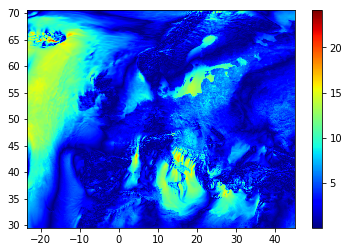

In [181]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
lonStart = np.min(lon)-360
lonEnd = np.max(lon)-360

latStart = np.min(lat)
latEnd = np.max(lat)
lonRange = ((lon > lonStart) & (lon < lonEnd ))
latRange = ((lat > latStart) & (lat < latEnd ))

#data = temp[latRange, :]
#data = data[:, lonRange]
zeroPoint = 273.15
#print(data[0,0]-zeroPoint)
plt.imshow(np.sqrt(v**2), origin = 'lower', cmap='jet', extent=[lonStart,lonEnd,latStart,latEnd], aspect = 'auto')

# Place a colorbar next to the map
plt.colorbar()

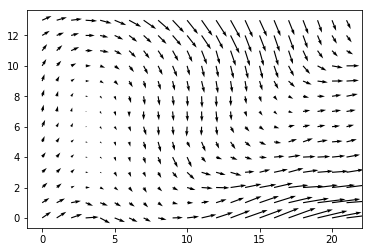

In [19]:
l = 50
plt.quiver(u[::l,::l], v[::l,::l])

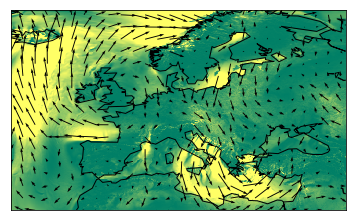

In [209]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
fig,ax=plt.subplots(1)

#lonStart = 10
#lonEnd = 20
#latStart = 45
#latEnd = 55
m = Basemap(width=12000000,height=9000000,projection ='cyl',
            resolution='c',llcrnrlon=lonStart,llcrnrlat=latStart,\
            urcrnrlon=lonEnd,urcrnrlat=latEnd,ax = ax)

# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
#m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
#m.fillcontinents(color='coral',lake_color='aqua', zorder = 0);
l = 40
x,y = np.meshgrid(lon-360,lat)
mag = u**2+v**2
quiv = m.quiver(x[::l,::l],y[::l,::l],u[::l,::l], v[::l,::l],\
                latlon=True,\
                color = 'black',\
                scale=50,scale_units='inches',zorder=1)

m.imshow(mag/np.max(mag), cmap='summer', vmax = 0.2, zorder = 0)
plt.show()

[[37.  37.  37.  37.  37.  37.  37. ]
 [37.3 37.3 37.3 37.3 37.3 37.3 37.3]
 [37.6 37.6 37.6 37.6 37.6 37.6 37.6]
 [37.9 37.9 37.9 37.9 37.9 37.9 37.9]
 [38.2 38.2 38.2 38.2 38.2 38.2 38.2]
 [38.5 38.5 38.5 38.5 38.5 38.5 38.5]
 [38.8 38.8 38.8 38.8 38.8 38.8 38.8]]


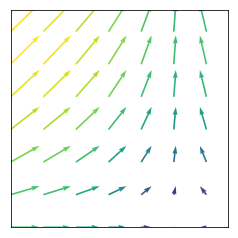

In [106]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap

X, Y = np.meshgrid(np.arange(-123,-121,0.3),np.arange(37,39,0.3))
print(Y)
U = np.cos(X+123)*12
V = np.sin(Y-37)*12
mag = np.hypot(U,V)

fig,ax=plt.subplots(1)
m=Basemap(projection ='cyl',resolution='l',llcrnrlat=37,llcrnrlon=-123,
          urcrnrlat=39,urcrnrlon=-121,ax=ax)

quiv = m.quiver(X,Y,U,V,mag,zorder=2,latlon=True,scale=30,scale_units='inches')

# Scattered points won't be on the grid
x0=X[2,2] - 0.025
y0=Y[2,2]

u0=U[2,2]
v0=V[2,2] + 0.5 
SCALE = 72.
#plt.arrow(x0,y0,u0/SCALE,v0/SCALE)

plt.show()

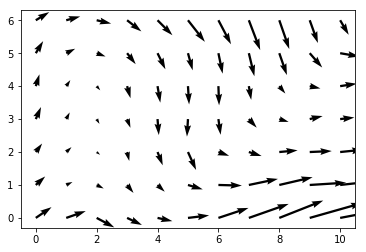

In [74]:
#plt.quiver(u[::l,::l], v[::l,::l], length = 10)

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
l = 100
q = ax.quiver( u[::l,::l], v[::l,::l])
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()

In [46]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np


map = Basemap(llcrnrlon=-93.7, llcrnrlat=28., urcrnrlon=-66.1, urcrnrlat=39.5,
              projection='lcc', lat_1=30., lat_2=60., lat_0=34.83158, lon_0=-98.)

ds = gdal.Open("../sample_files/wrf.tiff")
lons = ds.GetRasterBand(4).ReadAsArray()
lats = ds.GetRasterBand(5).ReadAsArray()
u10 = ds.GetRasterBand(1).ReadAsArray()
v10 = ds.GetRasterBand(2).ReadAsArray()
speed = np.sqrt(u10*u10 + v10*v10)

x, y = map(lons, lats)

yy = np.arange(0, y.shape[0], 4)
xx = np.arange(0, x.shape[1], 4)

points = np.meshgrid(yy, xx)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#cc9955', lake_color='aqua', zorder = 0)
map.drawcoastlines(color = '0.15')

map.quiver(x[points], y[points], 
    u10[points], v10[points], speed[points],
    cmap=plt.cm.autumn)

plt.show()

NameError: name 'gdal' is not defined

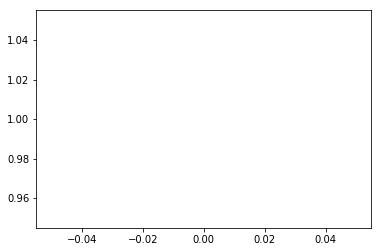

In [3]:
plt.plot(1)

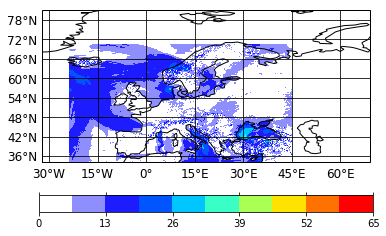

In [15]:
p = psy.plot.mapplot(file, lonlatbox='Europe', name = 'VMAX_10M')

In [ ]:
vectors = psy.plot.mapvector(
    file, name=[['v', 'u']] * 2, projection='robin',
    ax=(1, 2), lonlatbox='Europe')
vectors.plotters[0].update(arrowsize=500)
vectors.plotters[1].update(plot='stream')

KeyboardInterrupt: 

ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "/home/magnus/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/magnus/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/magnus/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/magnus/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/magnus/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/magnus/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, 

In [81]:
vectors.plotters[0].update(arrowsize=500)
plt.show()

In [78]:
vectors.plotters[0].update(arrowsize=5)
vectors.plotters[1].update(plot='stream')

In [59]:
from mpl_toolkits import *

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl
#from mpl_toolkits.basemap import Basemap, shiftgrid
from netCDF4 import Dataset
# specify date to plot.
yyyy=1993; mm=3; dd=14; hh=0
date = datetime.datetime(yyyy,mm,dd,hh)
# set OpenDAP server URL.
URLbase="http://nomads.ncdc.noaa.gov/thredds/dodsC/modeldata/cmd_pgbh/"
URL=URLbase+"%04i/%04i%02i/%04i%02i%02i/pgbh00.gdas.%04i%02i%02i%02i.grb2" %\
             (yyyy,yyyy,mm,yyyy,mm,dd,yyyy,mm,dd,hh)
data = Dataset(URL)
# read lats,lons
# reverse latitudes so they go from south to north.
latitudes = data.variables['lat'][::-1]
longitudes = data.variables['lon'][:].tolist()
# get sea level pressure and 10-m wind data.
# mult slp by 0.01 to put in units of hPa.
slpin = 0.01*data.variables['Pressure_msl'][:].squeeze()
uin = data.variables['U-component_of_wind_height_above_ground'][:].squeeze()
vin = data.variables['V-component_of_wind_height_above_ground'][:].squeeze()
# add cyclic points manually (could use addcyclic function)
slp = np.zeros((slpin.shape[0],slpin.shape[1]+1),np.float)
slp[:,0:-1] = slpin[::-1]; slp[:,-1] = slpin[::-1,0]
u = np.zeros((uin.shape[0],uin.shape[1]+1),np.float64)
u[:,0:-1] = uin[::-1]; u[:,-1] = uin[::-1,0]
v = np.zeros((vin.shape[0],vin.shape[1]+1),np.float64)
v[:,0:-1] = vin[::-1]; v[:,-1] = vin[::-1,0]
longitudes.append(360.); longitudes = np.array(longitudes)
# make 2-d grid of lons, lats
lons, lats = np.meshgrid(longitudes,latitudes)
# make orthographic basemap.
m = Basemap(resolution='c',projection='ortho',lat_0=60.,lon_0=-60.)
# create figure, add axes
fig1 = plt.figure(figsize=(8,10))
ax = fig1.add_axes([0.1,0.1,0.8,0.8])
# set desired contour levels.
clevs = np.arange(960,1061,5)
# compute native x,y coordinates of grid.
x, y = m(lons, lats)
# define parallels and meridians to draw.
parallels = np.arange(-80.,90,20.)
meridians = np.arange(0.,360.,20.)
# plot SLP contours.
CS1 = m.contour(x,y,slp,clevs,linewidths=0.5,colors='k',animated=True)
CS2 = m.contourf(x,y,slp,clevs,cmap=plt.cm.RdBu_r,animated=True)
# plot wind vectors on projection grid.
# first, shift grid so it goes from -180 to 180 (instead of 0 to 360
# in longitude).  Otherwise, interpolation is messed up.
ugrid,newlons = shiftgrid(180.,u,longitudes,start=False)
vgrid,newlons = shiftgrid(180.,v,longitudes,start=False)
# transform vectors to projection grid.
uproj,vproj,xx,yy = \
m.transform_vector(ugrid,vgrid,newlons,latitudes,31,31,returnxy=True,masked=True)
# now plot.
Q = m.quiver(xx,yy,uproj,vproj,scale=700)
# make quiver key.
qk = plt.quiverkey(Q, 0.1, 0.1, 20, '20 m/s', labelpos='W')
# draw coastlines, parallels, meridians.
m.drawcoastlines(linewidth=1.5)
m.drawparallels(parallels)
m.drawmeridians(meridians)
# add colorbar
cb = m.colorbar(CS2,"bottom", size="5%", pad="2%")
cb.set_label('hPa')
# set plot title
ax.set_title('SLP and Wind Vectors '+str(date))
plt.show()

# create 2nd figure, add axes
fig2 = plt.figure(figsize=(8,10))
ax = fig2.add_axes([0.1,0.1,0.8,0.8])
# plot SLP contours
CS1 = m.contour(x,y,slp,clevs,linewidths=0.5,colors='k',animated=True)
CS2 = m.contourf(x,y,slp,clevs,cmap=plt.cm.RdBu_r,animated=True)
# plot wind barbs over map.
barbs = m.barbs(xx,yy,uproj,vproj,length=5,barbcolor='k',flagcolor='r',linewidth=0.5)
# draw coastlines, parallels, meridians.
m.drawcoastlines(linewidth=1.5)
m.drawparallels(parallels)
m.drawmeridians(meridians)
# add colorbar
cb = m.colorbar(CS2,"bottom", size="5%", pad="2%")
cb.set_label('hPa')
# set plot title.
ax.set_title('SLP and Wind Barbs '+str(date))
plt.show()

RuntimeError: NetCDF: Access failure

In [244]:
#print(glob(join(path,'*.nc')))
files = glob(join(path,'*.nc'))

times = []
temperature = []
for f in files:
    dataset = Dataset(f) 
    startTime = dataset.variables['time'].units[14:]
    minutes = dataset.variables['time'][:]
    time = (datetime.strptime(startTime, '%Y-%m-%d %H:%M:%S'))
    #print(minutes)
    #print())
    lon = dataset.variables['lon'][:]
    lat = dataset.variables['lat'][:]
    temp = dataset.variables['VMAX_10M'][:]
    temp = (temp[0,0,:,:])
    lonStart = 8
    lonEnd = 8.5
    latStart = 51
    latEnd = 51.5
    lonRange = ((lon > lonStart) & (lon < lonEnd ))
    latRange = ((lat > latStart) & (lat < latEnd ))
    times.append(time+timedelta(minutes = minutes[0]))
    data = temp[latRange, :]
    data = data[:, lonRange]
    temperature.append(data[0,0])
    
arr = np.transpose(np.array([times, temperature]))
df = pd.DataFrame(arr, columns = ['time', 'temperature'])
df.time = pd.to_datetime(df.time)
df.index = df.time

In [246]:
import pandas as pd
df = pd.DataFrame(arr, columns = ['time', 'temperature'])
df.time = pd.to_datetime(df.time)
df.index = df.time

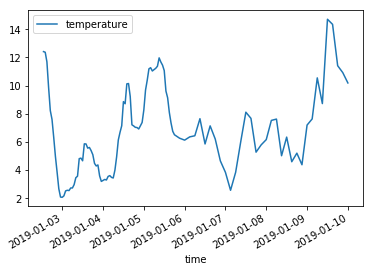

In [247]:
df.plot(y = 'temperature')

In [96]:
print(lon>5)
print(temp[:,lon>5])

[False False False ...  True  True  True]
[[243.53052 243.53052 243.53052 ... 243.53052 243.53052 243.53052]
 [244.60864 244.60864 244.60864 ... 244.74341 244.74341 244.74341]
 [244.72388 244.72388 244.72388 ... 244.7688  244.7688  244.7688 ]
 ...
 [250.10278 250.10278 250.10278 ... 250.08911 250.08911 250.08911]
 [249.9524  249.9524  249.9524  ... 249.96606 249.96606 249.96606]
 [249.55981 249.55981 249.55981 ... 249.55981 249.55981 249.55981]]


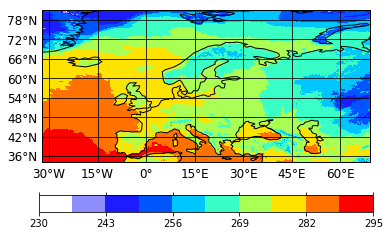

In [88]:
p = psy.plot.mapplot(file, lonlatbox='Europe', name = '2t')

In [84]:
print(len(lon))
print(len(lat))
import numpy as np
N = 1440

print(temp.shape)

f = np.roll(temp,int(N/2),1 )



1440
721
(721, 1440)


In [130]:
print(lon)

[0.0000e+00 2.5000e-01 5.0000e-01 ... 3.5925e+02 3.5950e+02 3.5975e+02]


In [6]:
path = '/media/data/owncloud/code/julian_magnus/J_and_M/grib2/ICON_GLOBAL2WORLD_025_EASY/' 
file = path + 'OUTPUT.nc'
#file = 'demo.nc'

dataset = Dataset(file) 
print(dataset.dimensions.keys())
print(dataset.variables.keys())
time = dataset.variables['time']
print(time[:])

odict_keys(['time', 'lon', 'lat', 'height'])
odict_keys(['time', 'lon', 'lat', 'height', '2t'])
[7920.]


In [8]:
%% Open netcdf
ncid = netcdf.open('yourfile.nc','NC_NOWRITE');
%% Get all information about the netcdf file
fileinfo = ncinfo('yourfile.nc');
disp(fileinfo);
%% get info on a dimension
dim_0=netcdf.inqVar(ncid,0);
dim_1=netcdf.inqVar(ncid,1);
dim_X=netcdf.inqVar(ncid,X); (with X==max number dimension in the file)
%% get values corresponding to a dimension
var_0 = netcdf.getVar(ncid,0); (e.g. var_0=latitude)
var_1 = netcdf.getVar(ncid,1); (e.g. var_1=longitude)
var_X= netcdf.getVar(ncid,X); (e.g. var_X=SST)

UsageError: Cell magic `%%` not found.


In [9]:
print(dataset.variables.keys())

odict_keys(['time', 'lon', 'lat', 'height', '2t'])


In [10]:
dataset.dimensions

OrderedDict([('time',
              <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1),
             ('lon',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 1440),
             ('lat',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 721),
             ('height',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'height', size = 1)])

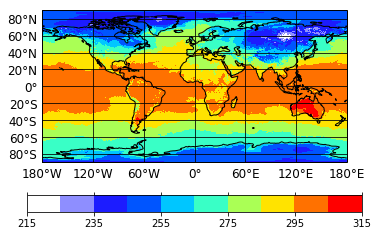

In [32]:
p = psy.plot.mapplot(file, name = '2t')

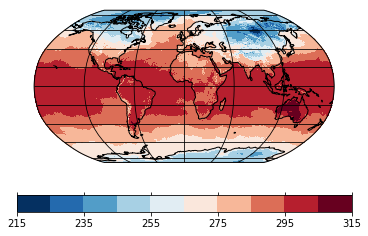

In [35]:
maps = psy.plot.mapplot(file, name='2t', projection='robin',
                        cmap='RdBu_r')